# Regresja liniowa

W modelu liniowym zależność między $Y$ a $X_1, ..., X_p$ modelujemy jako:

$$Y=\beta_0 + \beta_1 X_1 + ... + \beta_p X_p + \epsilon$$

Wartości współczynników $\beta_0, ..., \beta_p$ szacowane są metodą "najmniejszych kwadratów", w której minimalizowana jest wartość $RSS$ (*Residual Sum of Squares*):

$$RSS=\sum_{i = 1}^n (y_i - \hat{y_i})^2$$



## Model liniowy w `statsmodels`

Wykorzystamy zbiór [mtcars](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).
W pierwszym przykładzie tworzymy model w postaci: 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} $$

In [4]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("mtcars.csv")

y = df.mpg
X = sm.add_constant(df.hp)

print(X.head())
print()
print(y.head())

   const   hp
0    1.0  110
1    1.0  110
2    1.0   93
3    1.0  110
4    1.0  175

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [5]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

Procedura `fit` zwraca obiekt typu [`RegressionResults`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

W podsumowaniu (`summary()`) podane są m.in. wartość $R^2$ oraz $p$-wartości szacowanych współczynników.

In [6]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.79e-07
Time:                        14:42:59   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Współczynniki $\hat{\beta_0}$ i $\hat{\beta_1}$ zapisane są w `lm_fit.params`.

In [7]:
lm_fit.params

const    30.098861
hp       -0.068228
dtype: float64

Reszty (*residuals*) zapisane są w `lm_fit.resid`.

In [8]:
lm_fit.resid.head()

0   -1.593750
1   -1.593750
2   -0.953631
3   -1.193750
4    0.541088
dtype: float64

W ocenie modelu przydatna jest także wizualizacja.

Text(0, 0.5, 'Residual')

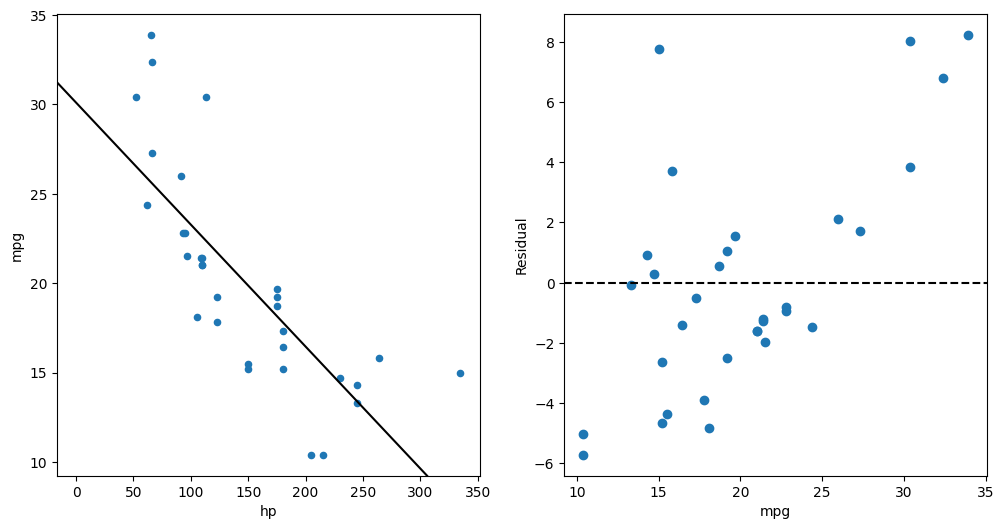

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.mpg, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('Residual')

Metoda `predict()` pozwala na predykcję wartości `mpg` dla nowych danych.

In [10]:
X_new = sm.add_constant([100, 150])
y_pred = lm_fit.predict(X_new)
y_pred

array([23.27603273, 19.86461883])

Tworząc model zawierający wiele zmiennych możemy skorzystać z `statsmodels.formula.api`, które pozwala podać 'wzór' modelu zamiast manualnie przygotowywać dane wejściowe. 
$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{cyl}$$

In [11]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula="mpg ~ hp + cyl", data=df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.16e-09
Time:                        14:43:00   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9083      2.191     16.847      0.000      32.428      41.389
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Względem poprzedniego modelu wartość $R^2$ wzrosła z $0.602$ do $0.741$. Zwróćmy uwagę, że $p$-wartość współczynnika `hp` wynosi 0.213, co sugeruje, że nie ma zależności między `mpg` a `hp`, mimo że wykryliśmy taką zależność w modelu jednoczynnikowym. Jest to spowodowane liniową współzależnością między zmiennymi.

<Axes: >

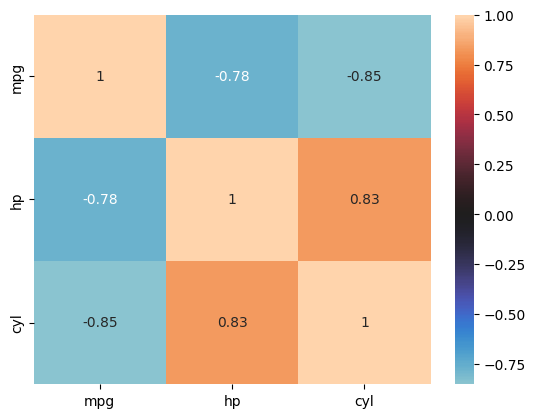

In [12]:
import seaborn as sns
sns.heatmap(df[["mpg", "hp", "cyl"]].corr(), annot=True, center=0.0)

Rozważmy alternatywny model:

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt}$$

In [13]:
lm2 = smf.ols(formula="mpg ~ hp + wt", data=df)
lm_fit2 = lm2.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           9.11e-12
Time:                        14:43:00   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model wielomianowy

Na wykresie stworzonym dla modelu `mpg ~ hp` widać, że faktyczna zależność między zmiennymi wyraźnie nieliniowa. Sprawdźmy, czy lepiej sprawdzi się poniższy model wielomianowy. 

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{hp}^2$$

In [14]:
lm3 = smf.ols(formula="mpg ~ hp + I(hp**2)", data=df)

lm_fit3 = lm3.fit()

lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     44.95
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.30e-09
Time:                        14:43:01   Log-Likelihood:                -79.801
No. Observations:                  32   AIC:                             165.6
Df Residuals:                      29   BIC:                             170.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.4091      2.741     14.744      0.000      34.804      46.015
hp            -0.2133      0.035     -6.115      0.000      -0.285      -0.142
I(hp ** 2)     0.0004   9.84e-05      4.275      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.211   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.579
Skew:                           0.844   Prob(JB):                        0.101
Kurtosis:                       3.767   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residual')

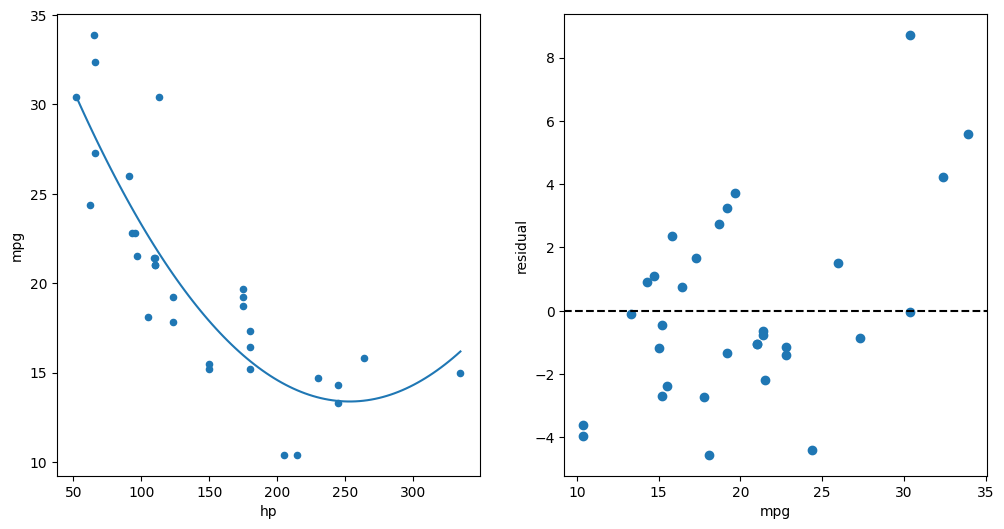

In [15]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='mpg', x='hp', ax=ax1)

x_plot = np.linspace(df.hp.min(), df.hp.max(), 100)
b0, b1, b2 = lm_fit3.params
y_plot = b0 + b1 * x_plot + b2 * x_plot**2
ax1.plot(x_plot, y_plot)

ax2.scatter(df.mpg, lm_fit3.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('mpg')
ax2.set_ylabel('residual')

## Modelowanie interakcji między zmiennymi

$$ \mathtt{mpg} = \hat{\beta_0} + \hat{\beta_1} \mathtt{hp} + \hat{\beta_2} \mathtt{wt} + \hat{\beta_3} \mathtt{hp} \cdot \mathtt{wt}$$

In [16]:
lm4 = smf.ols(formula="mpg ~ hp + wt + hp:wt", data=df) # Możemy też wykorzystać formula="mpg ~ hp*wt"

lm_fit4 = lm4.fit()

lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.98e-13
Time:                        14:43:01   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Zadania (Ćwiczenia 08)
1. Dla danych `boston` stwórz modele nieliniowe (np. wielomianowe) i modele zawierające interakcje. Przeprowadź ich diagnostykę i porównaj z modelami stworzonymi we wcześniejszym zadaniu.
2. Zaimplementuj metodę forward selection i zastosuj ją dla danych `boston`. Do porównania/ewaluacji modeli można stosować np. miarę Adjusted $R^2$ lub zbiór walidacyjny.
3. Wczytaj zbiór danych w pliku `housing.csv`, 
    - Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
    - Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
    - Modeluj zależność `median_house_value` od `ocean_proximity`.

<Axes: >

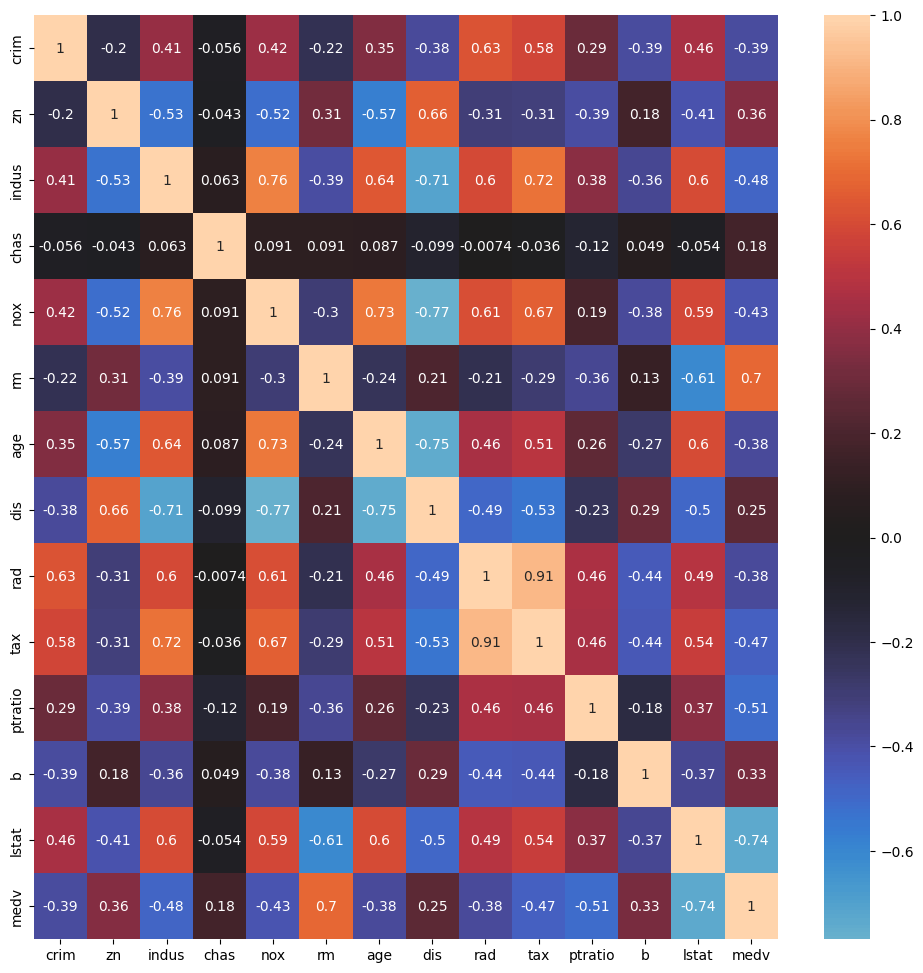

In [17]:
import seaborn as sns
df = pd.read_csv("boston.csv")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, center=0.0, ax=ax)

In [18]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Zadanie 1

In [24]:
import statsmodels.formula.api as smf

In [25]:
lm1 = smf.ols(formula="medv ~ lstat", data=df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        12:13:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

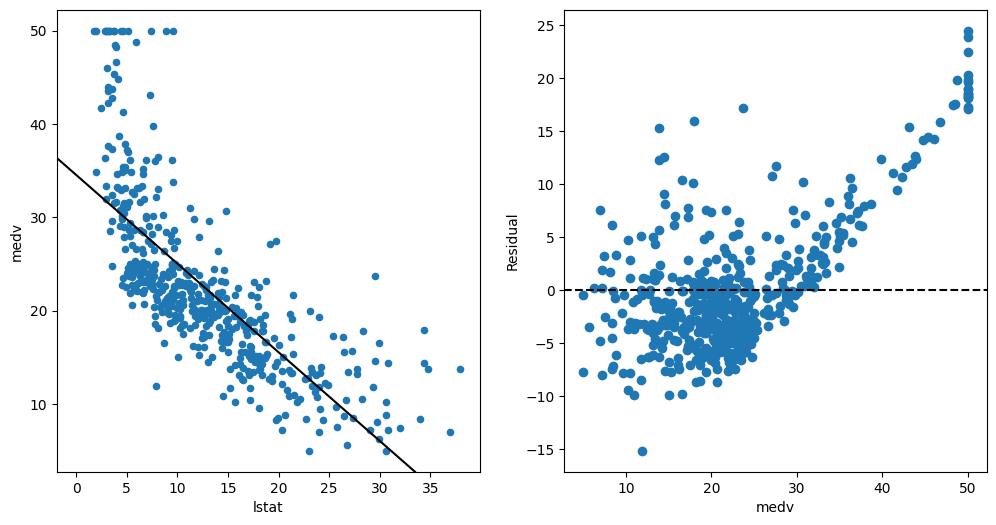

In [29]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind="scatter", y="medv", x="lstat", ax=ax1)
(b0, b1) = lm_fit1.params

ax1.axline(xy1=(0, b0), slope=b1, color="k")

ax2.scatter(df.medv, lm_fit1.resid)
ax2.axhline(0, linestyle="--", color="k")
ax2.set_xlabel("medv")
ax2.set_ylabel("Residual")

In [31]:
lm2 = smf.ols(formula="medv ~ rm", data=df)
lm_fit2 = lm1.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        14:06:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

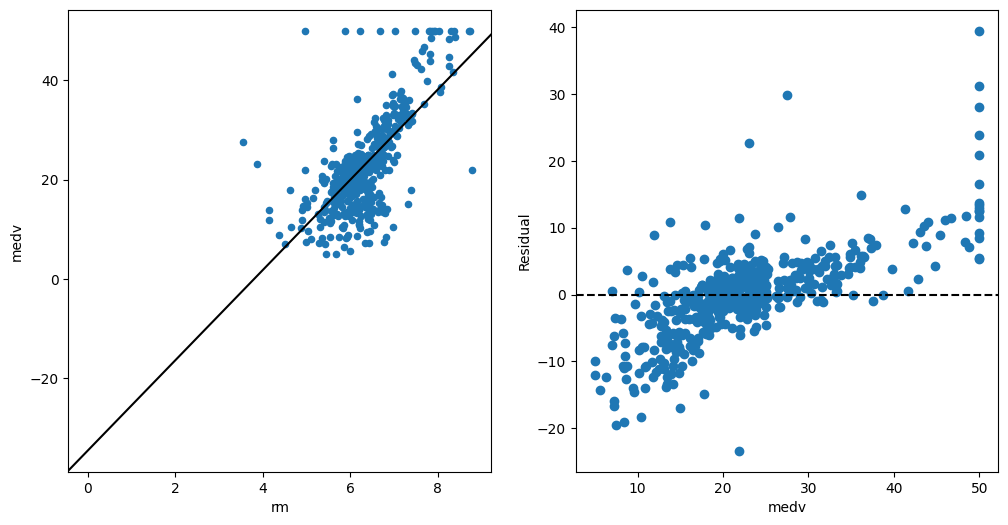

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind="scatter", y="medv", x="rm", ax=ax1)
(b0, b1) = lm_fit2.params

ax1.axline(xy1=(0, b0), slope=b1, color="k")

ax2.scatter(df.medv, lm_fit2.resid)
ax2.axhline(0, linestyle="--", color="k")
ax2.set_xlabel("medv")
ax2.set_ylabel("Residual")

In [35]:
lm3 = smf.ols("medv ~ lstat + rm", data=df)
lm_fit3 = lm3.fit()
lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          7.01e-112
Time:                        14:07:07   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
lstat         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
rm             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm4 = smf.ols(formula="medv ~ zn + rm", data=df)
lm_fit4 = lm3.fit()
lm_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          7.01e-112
Time:                        14:07:48   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
lstat         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
rm             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lm5 = smf.ols(formula="medv ~ zn + rm + zn:rm", data=df)
lm_fit5 = lm5.fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.66e-80
Time:                        14:08:46   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3315.
Df Residuals:                     502   BIC:                             3331.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.9934      2.845     -9.488      0.000     -32.583     -21.404
zn            -0.4698      0.130     -3.604      0.000      -0.726      -0.214
rm             7.7662      0.457     17.005      0.000       6.869       8.663
zn:rm          0.0792      0.019      4.105      0.000       0.041       0.117
==============================================================================
Omnibus:                      129.030   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.547
Skew:                           0.976   Prob(JB):                    5.73e-162
Kurtosis:                       8.605   Cond. No.                     1.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
lm6 = smf.ols(formula="medv ~ rm + nox", data=df)
lm_fit6 = lm6.fit()
lm_fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     289.9
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.83e-84
Time:                        14:09:45   Log-Likelihood:                -1646.3
No. Observations:                 506   AIC:                             3299.
Df Residuals:                     503   BIC:                             3311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2059      3.339     -5.452      0.000     -24.767     -11.645
rm             8.1567      0.417     19.546      0.000       7.337       8.977
nox          -18.9706      2.530     -7.497      0.000     -23.942     -13.999
==============================================================================
Omnibus:                      191.473   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.455
Skew:                           1.518   Prob(JB):                    1.90e-259
Kurtosis:                       9.877   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm7 = smf.ols(formula="medv ~ rm + nox + rm:nox", data=df)
lm_fit7 = lm7.fit()
lm_fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     240.7
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           9.32e-97
Time:                        14:09:42   Log-Likelihood:                -1614.7
No. Observations:                 506   AIC:                             3237.
Df Residuals:                     502   BIC:                             3254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -113.3734     12.069     -9.394      0.000    -137.086     -89.661
rm            23.4321      1.911     12.260      0.000      19.677      27.187
nox          146.4700     20.398      7.181      0.000     106.395     186.545
rm:nox       -26.7521      3.276     -8.167      0.000     -33.188     -20.316
==============================================================================
Omnibus:                      232.416   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.713
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                      11.113   Cond. No.                         665.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm8 = smf.ols(formula="medv ~ zn + rm + age", data=df)
lm_fit8 = lm8.fit()
lm_fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.23e-82
Time:                        14:14:48   Log-Likelihood:                -1648.1
No. Observations:                 506   AIC:                             3304.
Df Residuals:                     502   BIC:                             3321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.3266      2.855     -8.872      0.000     -30.935     -19.718
zn             0.0204      0.015      1.362      0.174      -0.009       0.050
rm             8.2754      0.422     19.609      0.000       7.446       9.105
age           -0.0639      0.012     -5.247      0.000      -0.088      -0.040
==============================================================================
Omnibus:                      187.619   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.048
Skew:                           1.443   Prob(JB):                    1.84e-283
Kurtosis:                      10.310   Cond. No.                         766.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm9 = smf.ols(formula="medv ~ zn + rm + age + zn:rm", data=df)
lm_fit9 = lm9.fit()
lm_fit9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.25e-86
Time:                        14:15:43   Log-Likelihood:                -1636.4
No. Observations:                 506   AIC:                             3283.
Df Residuals:                     501   BIC:                             3304.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.7393      3.019     -6.539      0.000     -25.670     -13.808
zn            -0.5991      0.128     -4.677      0.000      -0.851      -0.347
rm             7.4640      0.445     16.766      0.000       6.589       8.339
age           -0.0704      0.012     -5.874      0.000      -0.094      -0.047
zn:rm          0.0915      0.019      4.868      0.000       0.055       0.128
==============================================================================
Omnibus:                      197.020   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1416.117
Skew:                           1.518   Prob(JB):                    3.12e-308
Kurtosis:                      10.612   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
lm10 = smf.ols(formula="medv ~ zn + rm + age + zn:age", data=df)
lm_fit10 = lm10.fit()
lm_fit10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           4.83e-82
Time:                        14:15:43   Log-Likelihood:                -1646.2
No. Observations:                 506   AIC:                             3302.
Df Residuals:                     501   BIC:                             3323.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2158      2.901     -8.346      0.000     -29.916     -18.515
zn            -0.0301      0.030     -1.016      0.310      -0.088       0.028
rm             8.1576      0.425     19.193      0.000       7.323       8.993
age           -0.0702      0.013     -5.592      0.000      -0.095      -0.046
zn:age         0.0016      0.001      1.974      0.049    7.24e-06       0.003
==============================================================================
Omnibus:                      196.256   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.028
Skew:                           1.515   Prob(JB):                    1.95e-303
Kurtosis:                      10.545   Cond. No.                     9.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
lm11 = smf.ols(formula="medv ~ zn + rm + age + rm:age", data=df)
lm_fit11 = lm11.fit()
lm_fit11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.57e-85
Time:                        14:15:43   Log-Likelihood:                -1638.0
No. Observations:                 506   AIC:                             3286.
Df Residuals:                     501   BIC:                             3307.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.2807      8.230     -7.324      0.000     -76.451     -44.111
zn            -0.0041      0.016     -0.260      0.795      -0.035       0.027
rm            13.8814      1.308     10.609      0.000      11.311      16.452
age            0.3890      0.101      3.852      0.000       0.191       0.587
rm:age        -0.0729      0.016     -4.517      0.000      -0.105      -0.041
==============================================================================
Omnibus:                      190.176   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1288.760
Skew:                           1.475   Prob(JB):                    1.41e-280
Kurtosis:                      10.240   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
lm12 = smf.ols(formula="medv ~ zn + rm + age + rm:age:zn", data=df)
lm_fit12 = lm12.fit()
lm_fit12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.87e-83
Time:                        14:15:44   Log-Likelihood:                -1643.3
No. Observations:                 506   AIC:                             3297.
Df Residuals:                     501   BIC:                             3318.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.7032      2.954     -7.686      0.000     -28.507     -16.900
zn            -0.0582      0.029     -1.980      0.048      -0.116      -0.000
rm             7.9602      0.431     18.487      0.000       7.114       8.806
age           -0.0747      0.013     -5.944      0.000      -0.099      -0.050
rm:age:zn      0.0004      0.000      3.104      0.002       0.000       0.001
==============================================================================
Omnibus:                      201.962   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.869
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                      10.718   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Zadanie 2

In [1]:
# 2. Zaimplementuj metodę forward selection i zastosuj ją dla danych `boston`. 
# Do porównania/ewaluacji modeli można stosować np. miarę Adjusted $R^2$ lub zbiór walidacyjny.

In [26]:
df = pd.read_csv("boston.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
from typing import List, Tuple

In [33]:
X = df.drop(["medv"], axis=1).columns.to_list()
y = "medv"

In [45]:
def get_power_set(data: List[str]):
    yield []
    for i in range(len(data)):
        for x in get_power_set(data[i+1:]):
            yield[data[i]] + x

In [46]:
list(get_power_set(X))

[[],
 ['crim'],
 ['crim', 'zn'],
 ['crim', 'zn', 'indus'],
 ['crim', 'zn', 'indus', 'chas'],
 ['crim', 'zn', 'indus', 'chas', 'nox'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax'],
 ['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio'],
 ['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'b'],
 ['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'b',
  'lstat'],
 ['crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'lstat'],
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'b'],
 ['crim',
  'zn',
  '

In [75]:
def forward_selection(X_labels: List[str], y_label: str, data: pd.core.frame.DataFrame, delta: str = 0.00000005) -> Tuple[float, List[str]]:
    
    best_rsquared_adj = 0
    best_x_labels = []
    
    power_set = get_power_set(X_labels)
    for s in power_set:
        if len(s) == 0:
            continue
        
        X = data[s]
        y = data[[y_label]]
        lm = sm.OLS(y, X)
        lm_fit = lm.fit()
        rsquared_adj = lm_fit.rsquared_adj
        
        print(f"R^2: {rsquared_adj} for X_labels: {s}")
        
        if abs(rsquared_adj - best_rsquared_adj) < delta:
            break
        elif rsquared_adj > best_rsquared_adj + delta:
            best_rsquared_adj = rsquared_adj
            best_x_labels = s
    
    return (best_rsquared_adj, best_x_labels)

In [76]:
best_x_labels = forward_selection(X, y, df)

R^2: 0.04820198700949119 for X_labels: ['crim']
R^2: 0.325551189909291 for X_labels: ['crim', 'zn']
R^2: 0.6962524692670855 for X_labels: ['crim', 'zn', 'indus']
R^2: 0.7057721775752606 for X_labels: ['crim', 'zn', 'indus', 'chas']
R^2: 0.8698698993094107 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox']
R^2: 0.9367446973602481 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm']
R^2: 0.9368073835277237 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age']
R^2: 0.9465652369008107 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis']
R^2: 0.9465782169238439 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad']
R^2: 0.947535905451451 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax']
R^2: 0.9493919242497207 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio']
R^2: 0.9525001569816095 for X_labels: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'a

In [77]:
best_x_labels

(np.float64(0.9582583028770714),
 ['crim',
  'zn',
  'chas',
  'nox',
  'rm',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'b',
  'lstat'])

### Zadanie 3

In [119]:
housing = pd.read_csv("housing.csv")
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [120]:
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [121]:
housing = housing.fillna({"total_bedrooms": housing["total_bedrooms"].mean()})

In [122]:
len(housing[housing.isna().any(axis=1)])

0

In [123]:
df = housing[["median_house_value", "ocean_proximity"]]
df.head(5)

,median_house_value,ocean_proximity
0,452600.0,NEAR BAY
1,358500.0,NEAR BAY
2,352100.0,NEAR BAY
3,341300.0,NEAR BAY
4,342200.0,NEAR BAY


In [124]:
df.loc[:, "ocean_proximity"] = df.loc[:, "ocean_proximity"].str.replace(" ", "_")

In [125]:
df.head(5)

,median_house_value,ocean_proximity
0,452600.0,NEAR_BAY
1,358500.0,NEAR_BAY
2,352100.0,NEAR_BAY
3,341300.0,NEAR_BAY
4,342200.0,NEAR_BAY


In [126]:
df = pd.get_dummies(df)
df = df.drop(["ocean_proximity_NEAR_OCEAN"], axis=1)
df.head(5)

,median_house_value,ocean_proximity_<1H_OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR_BAY
0,452600.0,False,False,False,True
1,358500.0,False,False,False,True
2,352100.0,False,False,False,True
3,341300.0,False,False,False,True
4,342200.0,False,False,False,True


In [140]:
df.columns = ['median_house_value', 'ONE_H_OCEAN',
       'INLAND', 'ISLAND', 'NEAR_BAY']

In [141]:
df.columns

Index(['median_house_value', 'ONE_H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY'], dtype='object')

In [143]:
lm = smf.ols("median_house_value ~ NEAR_BAY + ISLAND + INLAND + ONE_H_OCEAN", data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1612.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:31:50   Log-Likelihood:            -2.6706e+05
No. Observations:               20640   AIC:                         5.341e+05
Df Residuals:                   20635   BIC:                         5.342e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.494e+05   1953.904    127.659      0.000    2.46e+05    2.53e+05
NEAR_BAY[T.True]     9778.3344   2872.105      3.405      0.001    4148.781    1.54e+04
ISLAND[T.True]        1.31e+05   4.51e+04      2.905      0.004    4.26e+04    2.19e+05
INLAND[T.True]      -1.246e+05   2316.625    -53.797      0.000   -1.29e+05    -1.2e+05
ONE_H_OCEAN[T.True] -9349.6920   2220.014     -4.212      0.000   -1.37e+04   -4998.289
==============================================================================
Omnibus:                     2667.739   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3850.482
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                       3.754   Cond. No.                         74.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""